In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from StackingClassifier import StackingClassifier 
from sklearn.ensemble import StackingClassifier as SklearnStackingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np


In [4]:
# Load datasets
datasets = {
    'Breast Cancer': load_breast_cancer(),
    'Iris': load_iris()
}

# Define base classifiers
base_classifiers = [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)]

stacking = StackingClassifier(base_classifiers)
sklearn_stacking = SklearnStackingClassifier(estimators=[('dt1', DecisionTreeClassifier(max_depth=1)), ('dt3', DecisionTreeClassifier(max_depth=3))],
                                      final_estimator=DecisionTreeClassifier(max_depth=1))

results = {}
for name, data in datasets.items():
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    stacking.fit(X_train, y_train)
    sklearn_stacking.fit(X_train, y_train)

    stacking_pred = stacking.predict(X_test)
    sklearn_stacking_pred = sklearn_stacking.predict(X_test)

    stacking_score = accuracy_score(y_test, stacking_pred)
    sklearn_stacking_score = accuracy_score(y_test, sklearn_stacking_pred)

    results[name] = {
        'Stacking': stacking_score,
        'Scikit-learn Stacking': sklearn_stacking_score
    }


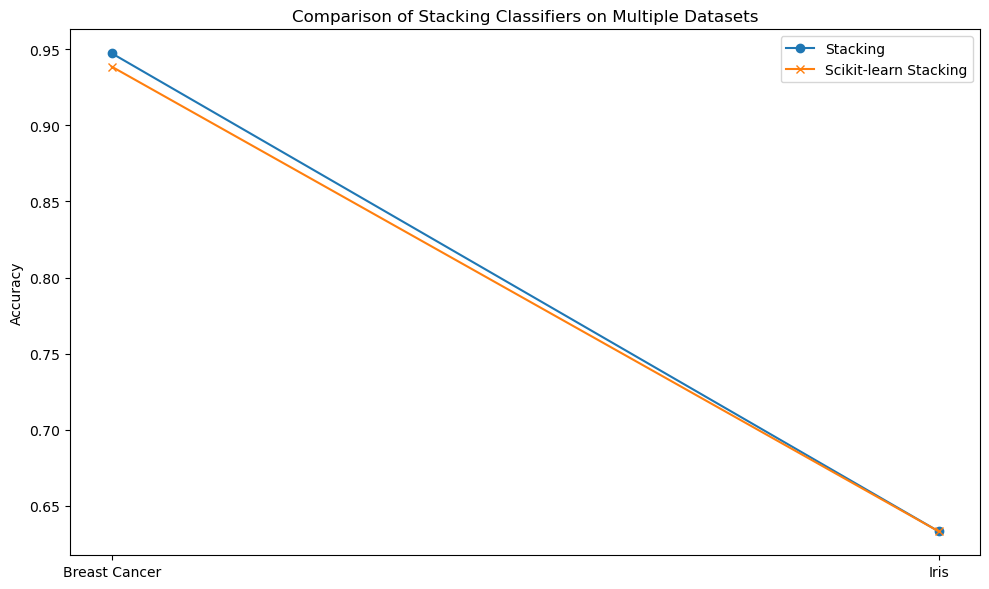

In [3]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
labels = list(results.keys())
scores = [results[name]['Stacking'] for name in labels]
sklearn_scores = [results[name]['Scikit-learn Stacking'] for name in labels]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

ax.plot(x, scores, label='Stacking', marker='o')
ax.plot(x, sklearn_scores, label='Scikit-learn Stacking', marker='x')

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Stacking Classifiers on Multiple Datasets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()